In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('zomato_dataset.csv')

In [3]:
data['Restaurant Name'].nunique()

826

In [4]:
BK = data[data['Restaurant Name'] == 'Burger King']
BK

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
832,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Burger,BESTSELLER,410,90.0
833,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Medium Fries,BESTSELLER,180,105.0
834,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Whopper,BESTSELLER,233,199.0
835,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings Fried - Ten Pieces,NaN,17,349.0
836,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Veg Burger,BESTSELLER,173,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
80074,Burger King,3.4,3.8,261,0,Beverages,The Pavillion,Pune,Choco Lava Cup,NaN,142,109.0
80075,Burger King,3.4,3.8,261,0,Beverages,The Pavillion,Pune,Chocolate Mousse Cup,NaN,22,109.0
80076,Burger King,3.4,3.8,261,0,Beverages,The Pavillion,Pune,Chocochip Muffin,NaN,7,129.0
80077,Burger King,3.4,3.8,261,0,Beverages,The Pavillion,Pune,Boneless Wings Regular,NaN,72,149.0


In [5]:
BK['City'].unique()

array([' Hyderabad', ' Bangalore', ' Kochi', ' Kolkata', ' Jaipur',
       ' Mumbai', ' Pune'], dtype=object)

In [6]:
Burger_King = BK[(BK['City'] == ' Hyderabad') | (BK['City'] == ' Bangalore') | (BK['City'] == ' Kolkata') | (BK['City'] == ' Jaipur')]
Burger_King


,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
832,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Burger,BESTSELLER,410,90.0
833,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Medium Fries,BESTSELLER,180,105.0
834,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Whopper,BESTSELLER,233,199.0
835,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings Fried - Ten Pieces,NaN,17,349.0
836,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Veg Burger,BESTSELLER,173,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77347,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Mango Thick Shake,NaN,21,189.0
77348,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Berry Blast Thick Shake,NaN,29,189.0
77349,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Chocolate Mousse Cup,NaN,166,109.0
77350,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Boneless Wings Regular,NaN,72,149.0


In [7]:
Burger_King.loc[:,'Restaurant_Success'] = None

<ipython-input-7-ee81ea5f2717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Burger_King.loc[:,'Restaurant_Success'] = None


In [8]:
for index, row in Burger_King.iterrows():
    if row['Dining Rating'] >= 4.0 and row['Delivery Rating'] >= 4.0:
        Burger_King.loc[index, 'Restaurant_Success'] = 2
    elif 3.0 <= row['Dining Rating'] < 4.0 and 3.0 <= row['Delivery Rating'] <= 4.0:
        Burger_King.loc[index, 'Restaurant_Success'] = 1
    else:
        Burger_King.loc[index, 'Restaurant_Success'] = 0

In [9]:
Burger_King['Restaurant_Success'].unique()

array([2, 0], dtype=object)

In [10]:
class ValueOutliers:
    def __init__(self, df):
        self.df = df

    def get_values_of_Outliers(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)

        values_not_in_range = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)][column_name]
        return values_not_in_range

In [11]:
value_range = ValueOutliers(Burger_King)
values_not_in_range_A = value_range.get_values_of_Outliers('Prices')
print("Values not in range for column :")
(values_not_in_range_A)

Values not in range for column :


860      749.0
867      849.0
868      899.0
870      749.0
874      705.0
948      695.0
66377    849.0
66378    899.0
66380    749.0
66384    705.0
66462    695.0
73399    849.0
73401    705.0
73476    695.0
76279    849.0
76280    899.0
76281    749.0
76283    705.0
76363    695.0
77217    849.0
77218    899.0
77219    749.0
77221    705.0
77301    695.0
Name: Prices, dtype: float64

In [12]:
class outliers:

    def __init__(self, df):
        self.df = df

    def DeleteOutliers(self, column_name):
        Q1 = self.df[column_name].quantile(0.25)
        Q3 = self.df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5*IQR)
        lower_bound = Q1 - (1.5*IQR)
        self.df.reset_index(drop=True, inplace=True)
        outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]
        self.df = self.df.drop(outliers.index)
        return self.df

In [13]:
outlier_remover = outliers(Burger_King)
BK_Clean = outlier_remover.DeleteOutliers('Votes')
BK_Clean = outlier_remover.DeleteOutliers('Prices')

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

BK_Clean['Best Seller'] = label_encoder.fit_transform(BK_Clean['Best Seller'])

In [15]:
BK_Clean

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
0,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings Fried - Ten Pieces,3,17,349.0,2
1,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Combo,0,77,239.0,2
2,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Double Patty + Crispy Chicken D...,1,77,258.0,2
3,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Veg Whopper,0,45,179.0,2
4,Burger King,4.1,4.1,253,0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings - five Pcs Fried + Five Pcs Grilled,3,21,349.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Chocolate Thick Shake,3,38,189.0,2
768,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Mango Thick Shake,3,21,189.0,2
769,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Berry Blast Thick Shake,3,29,189.0,2
770,Burger King,4.0,4.0,162,0,Beverages,Pink Square Mall,Jaipur,Boneless Wings Regular,3,72,149.0,2


In [16]:
def ordinal_encoding_rating(rating):
    if rating >= 4.0:
        return 2
    elif 3.2 <= rating < 4.0:
        return 1
    else:
        return 0

BK_Clean.loc[:, 'Dining Rating'] = BK_Clean['Dining Rating'].apply(ordinal_encoding_rating)
BK_Clean.loc[:, 'Delivery Rating'] = BK_Clean['Delivery Rating'].apply(ordinal_encoding_rating)

In [17]:
dining = BK_Clean[['Dining Rating','Dining Votes']]
delivery = BK_Clean[['Delivery Rating','Delivery Votes']]
covariance_matrix_dining = np.cov([dining.iloc[:,0], dining.iloc[:,1]])
covariance_matrix_delivery = np.cov([delivery.iloc[:,0], delivery.iloc[:,1]])
eigen_values_dining, eigen_vectors_dining = np.linalg.eig(covariance_matrix_dining)
eigen_values_delivery, eigen_vectors_delivery = np.linalg.eig(covariance_matrix_delivery)
pc = eigen_vectors_dining[0:1]
pc1 = eigen_vectors_delivery[0:1]

In [18]:
transformed_dining = np.dot(dining.iloc[:,:], pc.T)
transformed_delivery = np.dot(delivery.iloc[:,:], pc1.T)
new_dining = pd.DataFrame(transformed_dining, columns = ['Dining Rate'])
new_delivery = pd.DataFrame(transformed_delivery, columns = ['Delivery Rate'])

In [19]:
BK_Clean = BK_Clean.drop(columns=['Dining Rating', 'Dining Votes', 'Delivery Rating', 'Delivery Votes'])
BK_Clean["Dining Rate"] = new_dining["Dining Rate"]
BK_Clean["Delivery Rate"] = new_delivery["Delivery Rate"]

In [20]:
desired_order = ['Restaurant Name', 'Dining Rate', 'Delivery Rate', 'Cuisine ',
       'Place Name', 'City', 'Item Name', 'Best Seller', 'Votes', 'Prices', 'Restaurant_Success']
BK_Clean = BK_Clean[desired_order]

In [21]:
BK_Clean = BK_Clean.dropna()
BK_Clean.isnull().sum()

Restaurant Name       0
Dining Rate           0
Delivery Rate         0
Cuisine               0
Place Name            0
City                  0
Item Name             0
Best Seller           0
Votes                 0
Prices                0
Restaurant_Success    0
dtype: int64

In [22]:
BK_Clean

,Restaurant Name,Dining Rate,Delivery Rate,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
0,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings Fried - Ten Pieces,3,17,349.0,2
1,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Combo,0,77,239.0,2
2,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Double Patty + Crispy Chicken D...,1,77,258.0,2
3,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Veg Whopper,0,45,179.0,2
4,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings - five Pcs Fried + Five Pcs Grilled,3,21,349.0,2
...,...,...,...,...,...,...,...,...,...,...,...
743,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Whopper Jr Chicken Combo,3,0,288.0,2
744,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Veg Whopper Combo,3,0,318.0,2
745,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Chicken Whopper Combo,3,5,348.0,2
746,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Hot 'N' Cheezy Burger Combo,3,0,348.0,2


In [23]:
BK_Clean.columns

Index(['Restaurant Name', 'Dining Rate', 'Delivery Rate', 'Cuisine ',
       'Place Name', 'City', 'Item Name', 'Best Seller', 'Votes', 'Prices',
       'Restaurant_Success'],
      dtype='object')

In [24]:
BK_Clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 747
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Restaurant Name     724 non-null    object 
 1   Dining Rate         724 non-null    float64
 2   Delivery Rate       724 non-null    float64
 3   Cuisine             724 non-null    object 
 4   Place Name          724 non-null    object 
 5   City                724 non-null    object 
 6   Item Name           724 non-null    object 
 7   Best Seller         724 non-null    int64  
 8   Votes               724 non-null    int64  
 9   Prices              724 non-null    float64
 10  Restaurant_Success  724 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 84.0+ KB


In [25]:
BK_Clean['Restaurant_Success'] = BK_Clean['Restaurant_Success'].astype(int)
BK_Clean

,Restaurant Name,Dining Rate,Delivery Rate,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
0,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings Fried - Ten Pieces,3,17,349.0,2
1,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Combo,0,77,239.0,2
2,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Crispy Chicken Double Patty + Crispy Chicken D...,1,77,258.0,2
3,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Veg Whopper,0,45,179.0,2
4,Burger King,-1.753781,2.0,Fast Food,The Next Galleria Mall,Hyderabad,Chicken Wings - five Pcs Fried + Five Pcs Grilled,3,21,349.0,2
...,...,...,...,...,...,...,...,...,...,...,...
743,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Whopper Jr Chicken Combo,3,0,288.0,2
744,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Veg Whopper Combo,3,0,318.0,2
745,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Chicken Whopper Combo,3,5,348.0,2
746,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Hot 'N' Cheezy Burger Combo,3,0,348.0,2


In [26]:
test = BK_Clean[BK_Clean['City'] == ' Jaipur']

In [27]:
test

,Restaurant Name,Dining Rate,Delivery Rate,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices,Restaurant_Success
464,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Crispy Veg Combo,0,68,219.0,2
465,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Fiery Chicken Burger,3,33,199.0,2
466,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Whopper Jr Veg,3,34,149.0,2
467,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,2 Crispy Veg,3,19,140.0,2
468,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Crispy Veg Double Patty + Crispy Veg Double Patty,1,59,190.0,2
...,...,...,...,...,...,...,...,...,...,...,...
743,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Whopper Jr Chicken Combo,3,0,288.0,2
744,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Veg Whopper Combo,3,0,318.0,2
745,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Chicken Whopper Combo,3,5,348.0,2
746,Burger King,-1.842342,2.0,Beverages,Pink Square Mall,Jaipur,Hot 'N' Cheezy Burger Combo,3,0,348.0,2


In [28]:
BK_Clean = BK_Clean[(BK_Clean['City'] == ' Hyderabad') | (BK_Clean['City'] == ' Bangalore') | (BK_Clean['City'] == ' Kolkata')]

In [29]:
X = BK_Clean.drop(columns = ['Restaurant Name', 'Place Name', 'City', 'Restaurant_Success', 'Cuisine ', 'Item Name'])
y = BK_Clean.iloc[:,-1].values

In [30]:
X = pd.get_dummies(X, drop_first = True)

In [31]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [33]:
y_train

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,

In [34]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
X_test

,Dining Rate,Delivery Rate,Best Seller,Votes,Prices
421,-1.290541,2.0,3,0,259.0
458,-1.842342,2.0,3,12,269.0
123,-1.753781,2.0,3,55,39.0
35,-1.753781,2.0,3,0,418.0
429,-1.290541,2.0,3,6,348.0
...,...,...,...,...,...
390,-1.290541,2.0,3,7,289.0
384,-1.290541,2.0,3,5,234.0
323,-1.290541,2.0,1,10,456.0
62,-1.753781,2.0,3,0,179.0


In [36]:
# Predict the Success Rate
y_pred1 = logreg.predict(X_test)

In [37]:
y_pred1

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0])

In [38]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9666666666666667


In [39]:
test1 = test.drop(columns = ['Restaurant Name', 'Place Name', 'City', 'Restaurant_Success', 'Cuisine ', 'Item Name'])

In [40]:
test1

,Dining Rate,Delivery Rate,Best Seller,Votes,Prices
464,-1.842342,2.0,0,68,219.0
465,-1.842342,2.0,3,33,199.0
466,-1.842342,2.0,3,34,149.0
467,-1.842342,2.0,3,19,140.0
468,-1.842342,2.0,1,59,190.0
...,...,...,...,...,...
743,-1.842342,2.0,3,0,288.0
744,-1.842342,2.0,3,0,318.0
745,-1.842342,2.0,3,5,348.0
746,-1.842342,2.0,3,0,348.0


In [41]:
test1['Restaurant Succes'] = logreg.predict(test1)

In [42]:
test1['Restaurant Names'] = test['Restaurant Name']

In [43]:
desired_order1 = (['Restaurant Names', 'Dining Rate', 'Delivery Rate', 'Best Seller', 'Votes', 'Prices', 'Restaurant Succes'])
test1 = test1[desired_order1]

In [46]:
test1

,Restaurant Names,Dining Rate,Delivery Rate,Best Seller,Votes,Prices,Restaurant Succes
464,Burger King,-1.842342,2.0,0,68,219.0,2
465,Burger King,-1.842342,2.0,3,33,199.0,2
466,Burger King,-1.842342,2.0,3,34,149.0,2
467,Burger King,-1.842342,2.0,3,19,140.0,2
468,Burger King,-1.842342,2.0,1,59,190.0,2
...,...,...,...,...,...,...,...
743,Burger King,-1.842342,2.0,3,0,288.0,2
744,Burger King,-1.842342,2.0,3,0,318.0,2
745,Burger King,-1.842342,2.0,3,5,348.0,2
746,Burger King,-1.842342,2.0,3,0,348.0,2


In [45]:
BK_Clean = BK_Clean.drop(['Restaurant Name','Cuisine ','Place Name','City','Item Name'],axis = 1)

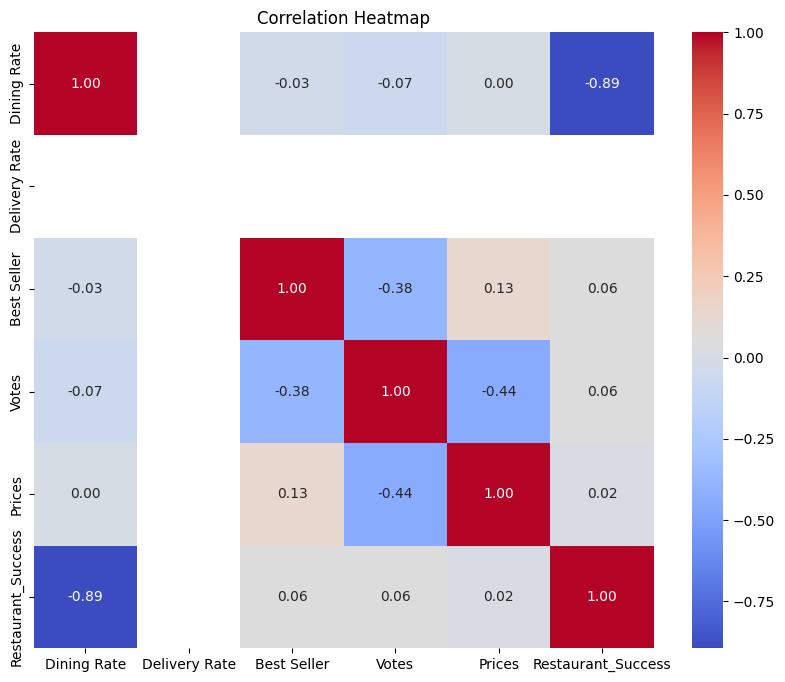

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix  = BK_Clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


Confusion Matrix Showing AN,AP,PN,PP

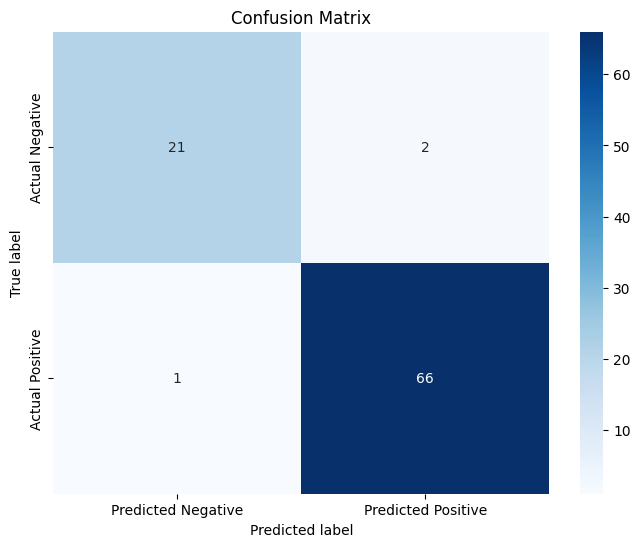

In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


Learning Curve showing the model's performance as a function of training data size therefor aiding in the assessment of whether the model would benefit from additional training data or if it has already reached its maximum performance.

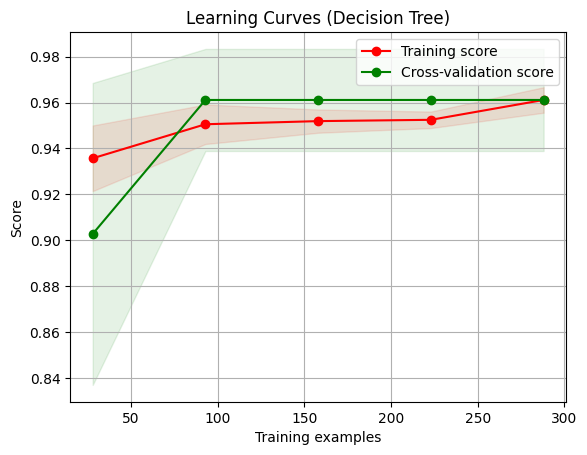

In [50]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,train_sizes=np.linspace(.1, 1.0, 5)):


  plt.figure()
  plt.title(title)
  if ylim is not None:
      plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")

  plt.legend(loc="best")
  return plt

title = "Learning Curves (Decision Tree)"
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train, y_train, cv=5)
plt.show()